In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.layers import MaxPool2D, GlobalAvgPool2D

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
cnn = Sequential()
cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=4, activation='relu'))
cnn.add( Conv2D(kernel_size=(3,3), filters=8, activation='relu'))
cnn.add( Conv2D(kernel_size=(3,3), filters=16, activation='relu'))
cnn.add(MaxPool2D())

cnn.add( Conv2D(kernel_size=(3,3), filters=16, activation= 'relu'))
cnn.add( Conv2D(kernel_size=(3,3), filters=16, activation= 'relu'))
cnn.add( Conv2D(kernel_size=(3,3), filters=32, activation= 'relu'))
cnn.add( Conv2D(kernel_size=(3,3), filters=32, activation= 'relu'))

cnn.add( Flatten())
cnn.add( Dense(units=32, activation = 'relu'))
cnn.add( Dense(units=10, activation = 'softmax'))

cnn.compile(loss= 'categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])



In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 4)         40        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 8)         296       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 32)          4

In [11]:
X_train= X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)

In [12]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [13]:
cnn.fit(X_train, y_train_cat, epochs=5, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 53s 982us/sample - loss: 0.2482 - accuracy: 0.9203 - val_loss: 0.0712 - val_accuracy: 0.9787
Epoch 2/5
54000/54000 [==============================] - 51s 938us/sample - loss: 0.0780 - accuracy: 0.9763 - val_loss: 0.0502 - val_accuracy: 0.9855
Epoch 3/5
54000/54000 [==============================] - 47s 876us/sample - loss: 0.0585 - accuracy: 0.9818 - val_loss: 0.0450 - val_accuracy: 0.9880
Epoch 4/5
54000/54000 [==============================] - 48s 893us/sample - loss: 0.0484 - accuracy: 0.9848 - val_loss: 0.0486 - val_accuracy: 0.9885
Epoch 5/5
54000/54000 [==============================] - 48s 887us/sample - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0398 - val_accuracy: 0.9880


In [14]:
y_pred = cnn.predict(X_test)

In [15]:
class_names = [str(x) for x in range(10)]

In [16]:
def plot_image(i, y_pred, y_test_class, img):
    y_pred, y_test_class, img = y_pred[i], y_test_class[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(y_pred)
    if predicted_label == y_test_class:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(y_pred),
                                class_names[y_test_class]),
                                color=color)

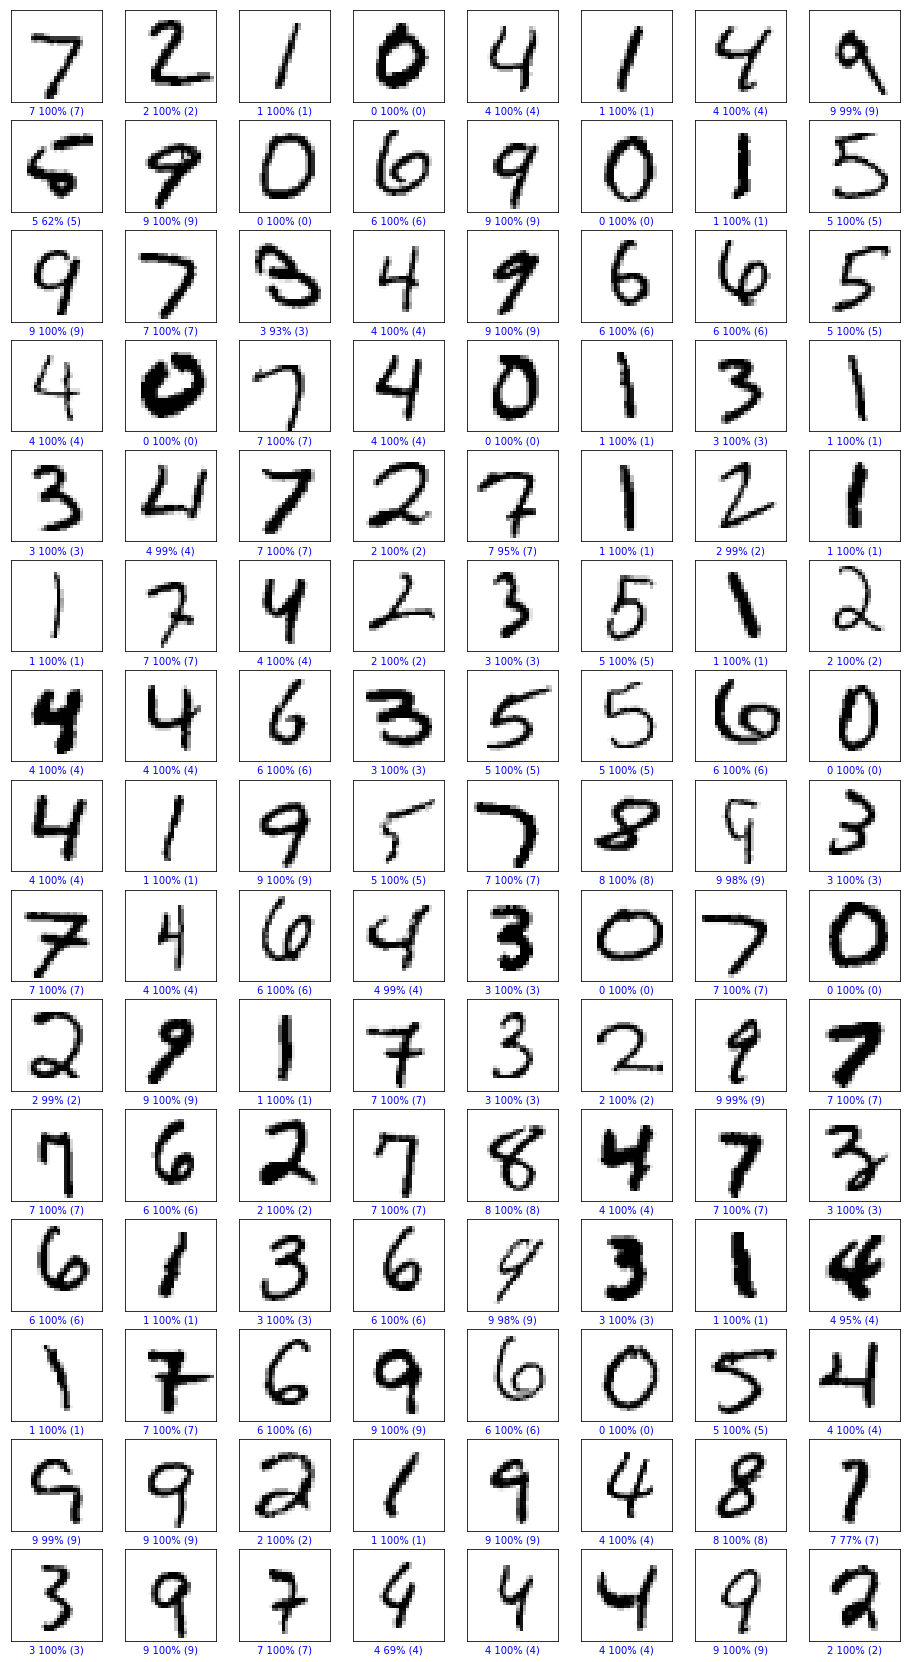

In [18]:
import matplotlib.pyplot as plt
num_rows = 15
num_cols = 8
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, y_pred, y_test, X_test.reshape(10000, 28, 28))
plt.show()  